### 1). Based on Moving Average Calculations:

##### * Find the moving average for the list of integers [4, 8, 12, 16, 20, 24, 28, 32, 36, 40] with a window size of 3.

In [1]:
import numpy as np

In [2]:
# List of integers
data = np.array([4, 8, 12, 16, 20, 24, 28, 32, 36, 40])

In [3]:
# Window size
window_size = 3

In [4]:
# Calculate the moving average
moving_avg = np.convolve(data, np.ones(window_size)/window_size, mode='valid')
print("Moving Average (Window Size 3):", moving_avg)

Moving Average (Window Size 3): [ 8. 12. 16. 20. 24. 28. 32. 36.]


##### * Calculate the moving average using a window size of 4 for the list [5, 10, 15, 20, 25, 30, 35, 40, 45, 50]

In [5]:
# Using a Pandas DataFrame
import pandas as pd

In [6]:
data = {'Numbers': [5, 10, 15, 20, 25, 30, 35, 40, 45, 50]}
df = pd.DataFrame(data)
df.head(2)

,Numbers
0,5
1,10


In [7]:
# Calculate the moving average with a window size of 4
df["Moving_Average"] = df["Numbers"].rolling(window=4).mean()
df

,Numbers,Moving_Average
0,5,NaN
1,10,NaN
2,15,NaN
3,20,12.5
4,25,17.5
5,30,22.5
6,35,27.5
7,40,32.5
8,45,37.5
9,50,42.5


##### * For the list [11, 22, 33, 44, 55, 66, 77, 88, 99, 110], find the moving average with a window size of 2.

In [8]:
# List of integers
data = np.array([11, 22, 33, 44, 55, 66, 77, 88, 99, 110])

In [9]:
# Window size
window_size = 2

In [10]:
# Calculate the moving average
moving_avg = np.convolve(data, np.ones(window_size)/window_size, mode='valid')
print("Moving Average (Window Size 2):", moving_avg)

Moving Average (Window Size 2): [ 16.5  27.5  38.5  49.5  60.5  71.5  82.5  93.5 104.5]


#### * Determine the moving average with a window size of 3 for the list [9, 18, 27, 36, 45, 54, 63, 72, 81, 90]

In [11]:
ds = {'Num': [9, 18, 27, 36, 45, 54, 63, 72, 81, 90]}
df = pd.DataFrame(ds)
df.head(2)

,Num
0,9
1,18


In [12]:
df['Moving_Average'] = df['Num'].rolling(window=3).mean()

In [13]:
df

,Num,Moving_Average
0,9,NaN
1,18,NaN
2,27,18.0
3,36,27.0
4,45,36.0
5,54,45.0
6,63,54.0
7,72,63.0
8,81,72.0
9,90,81.0


### 2). Perform an Augmented Dickey-Fuller (ADF) test on a dataset containing attrition data to determine whether the attrition rate is stationary

In [14]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller

In [15]:
att = pd.read_csv('attrition_data.csv')
att.head()

,Year,Attrition Rate
0,2011,10
1,2012,11
2,2013,12
3,2014,13
4,2015,15


In [16]:
att.columns

Index(['Year', 'Attrition Rate'], dtype='object')

In [17]:
adf = adfuller(att['Attrition Rate'])
adf

(0.9874563423317477,
 0.9941318193379074,
 2,
 10,
 {'1%': -4.331573, '5%': -3.23295, '10%': -2.7487},
 -512.53903655347)

In [18]:
print('ADF Statistic:', adf[0])
print('p-value:', adf[1])
print('Critical Values:')
for key, value in adf[4].items():
    print(f'   {key}: {value}')

ADF Statistic: 0.9874563423317477
p-value: 0.9941318193379074
Critical Values:
   1%: -4.331573
   5%: -3.23295
   10%: -2.7487


#### Conclusion: Since the ADF Statistic is > than the critical value at 5% and 
* the p-value is greater than 0.05,
* we Fail to Reject the Null Hypothesis
* and conclude that the attrition rate is non-stationary.

### 3). Implement an AutoRegressive(AR) model of order 1 (AR(1)) using Python and analyze its performance

* Generate synthetic data for an AR(1) process with known parameters.

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.tsa.ar_model import AutoReg

In [20]:
def generate_ar1_data(c, phi, num_steps, sigma=1, seed=42):
    np.random.seed(seed)
    ar1_data = [c]
    for t in range(1, num_steps):
        noise = np.random.normal(0, sigma)
        ar1_data.append(c + phi * ar1_data[t-1] + noise)
    return pd.Series(ar1_data)

In [21]:
c = 2
phi1 = 0.5
num_steps = 100

In [22]:
ar1_data = generate_ar1_data(c, phi1, num_steps)
ar1_data.head()

0    2.000000
1    3.496714
2    3.610093
3    4.452735
4    5.749397
dtype: float64

* Plot the generated time series to visualize the data

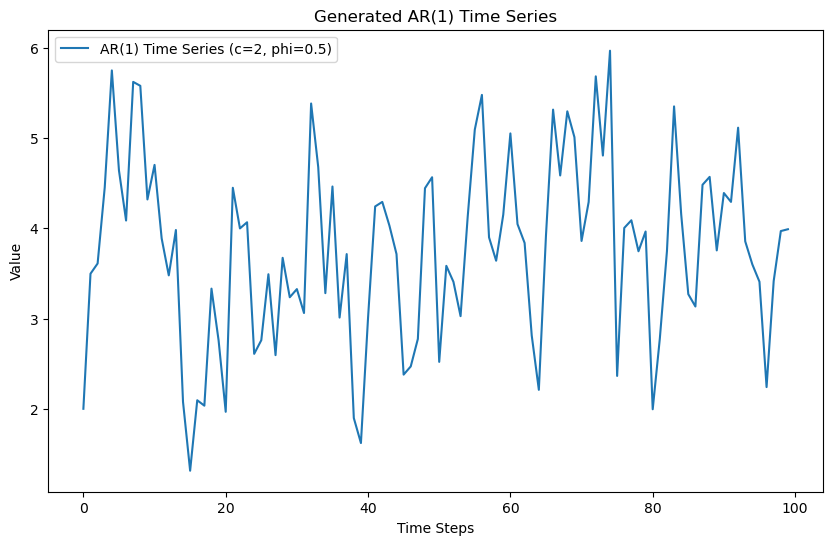

In [23]:
plt.figure(figsize=(10, 6))
plt.plot(ar1_data, label=f'AR(1) Time Series (c={c}, phi={phi1})')
plt.title('Generated AR(1) Time Series')
plt.xlabel('Time Steps')
plt.ylabel('Value')
plt.legend()
plt.show()

* Implement an AR(1) model using either NumPy or statsmodels

In [24]:
model = AutoReg(ar1_data, lags=1)
model_fit = model.fit()

* Print the summary of the model results to analyse the estimated coefficients and model performance

In [25]:
print(model_fit.summary())

                            AutoReg Model Results                             
Dep. Variable:                      y   No. Observations:                  100
Model:                     AutoReg(1)   Log Likelihood                -130.764
Method:               Conditional MLE   S.D. of innovations              0.907
Date:                Mon, 09 Sep 2024   AIC                            267.528
Time:                        10:16:45   BIC                            275.313
Sample:                             1   HQIC                           270.678
                                  100                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.0873      0.343      6.081      0.000       1.415       2.760
y.L1           0.4495      0.088      5.100      0.000       0.277       0.622
                                    Roots           

* Check the best lag using AIC and BIC

In [26]:
aic_values = []
bic_values = []
max_lag = 10  # Test up to 10 lags

In [27]:
for lag in range(1, max_lag+1):
    model = AutoReg(ar1_data, lags=lag)
    model_fit = model.fit()
    aic_values.append(model_fit.aic)
    bic_values.append(model_fit.bic)

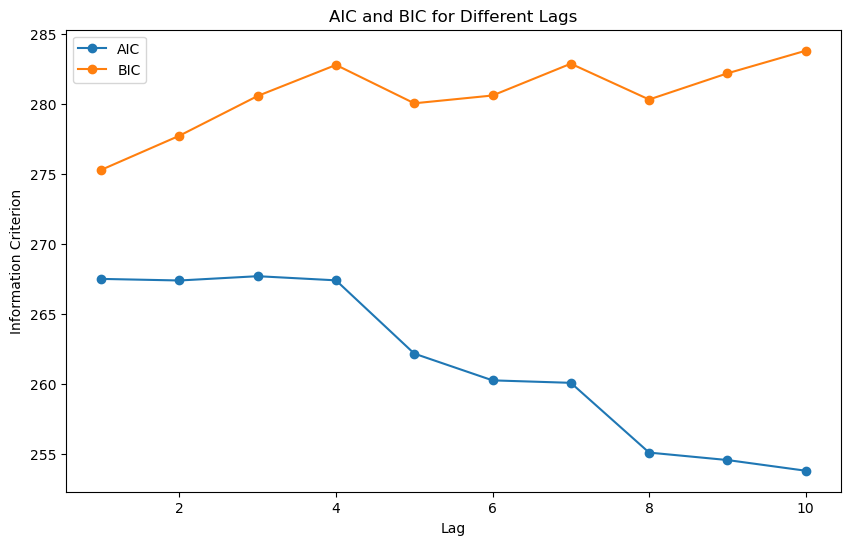

In [28]:
# Plot the AIC and BIC values to visualize the best lag
plt.figure(figsize=(10, 6))
plt.plot(range(1, max_lag+1), aic_values, label='AIC', marker='o')
plt.plot(range(1, max_lag+1), bic_values, label='BIC', marker='o')
plt.title('AIC and BIC for Different Lags')
plt.xlabel('Lag')
plt.ylabel('Information Criterion')
plt.legend()
plt.show()

In [29]:
#Find the optimal lag with the minimum AIC and BIC
best_lag_aic = np.argmin(aic_values) + 1  # Adding 1 because index starts from 0
best_lag_bic = np.argmin(bic_values) + 1

In [30]:
print(f'Best Lag according to AIC: {best_lag_aic}')
print(f'Best Lag according to BIC: {best_lag_bic}')

Best Lag according to AIC: 10
Best Lag according to BIC: 1


In [31]:
#Fit the AR model with the best lag according to AIC
best_model = AutoReg(ar1_data, lags=best_lag_aic).fit()
print(best_model.summary())

                            AutoReg Model Results                             
Dep. Variable:                      y   No. Observations:                  100
Model:                    AutoReg(10)   Log Likelihood                -114.914
Method:               Conditional MLE   S.D. of innovations              0.868
Date:                Mon, 09 Sep 2024   AIC                            253.827
Time:                        10:16:50   BIC                            283.825
Sample:                            10   HQIC                           265.924
                                  100                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.5521      0.724      3.527      0.000       1.134       3.971
y.L1           0.4592      0.105      4.384      0.000       0.254       0.664
y.L2          -0.0319      0.114     -0.279      0.7

In [32]:
#Fit the AR model with the best lag according to BIC
best_model = AutoReg(ar1_data, lags=best_lag_bic).fit()
print(best_model.summary())

                            AutoReg Model Results                             
Dep. Variable:                      y   No. Observations:                  100
Model:                     AutoReg(1)   Log Likelihood                -130.764
Method:               Conditional MLE   S.D. of innovations              0.907
Date:                Mon, 09 Sep 2024   AIC                            267.528
Time:                        10:16:50   BIC                            275.313
Sample:                             1   HQIC                           270.678
                                  100                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.0873      0.343      6.081      0.000       1.415       2.760
y.L1           0.4495      0.088      5.100      0.000       0.277       0.622
                                    Roots           